In [28]:
# write your code here
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import functions to perform scaling and normalization
from sklearn.preprocessing import StandardScaler

# import various functions from sklearn 
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram,cophenet

In [4]:
# write your code here
df1 = pd.read_csv('~/Desktop/New folder (3)/usl/inclass/day2/CO2_emission_data.csv')  
df1

,Region,CO2 Emissions,Ease of Business,Energy Usage,GDP,Internet Usage,Population Total
0,Europe,4294,151,1976,5652325082.000000,0.010000,3033659
1,Europe,4166,151,2172,7464446950.000000,0.024000,3014579
2,Europe,4254,151,2172,8376483740.000000,0.060000,2992724
3,Europe,3865,151,2068,9132562332.000000,0.096000,2968028
4,Europe,4056,151,2025,10701011856.000000,0.150000,2940880
...,...,...,...,...,...,...,...
1238,Africa,2274,90,7213,7178556337.000000,0.029000,11470022
1239,Africa,2226,90,7396,10702200822.000000,0.042000,11781612
1240,Africa,1654,90,7399,11541420981.000000,0.049000,12109620
1241,Africa,1845,90,7641,14640792100.000000,0.056000,12456527


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            1243 non-null   object 
 1   CO2 Emissions     1243 non-null   int64  
 2   Ease of Business  1243 non-null   int64  
 3   Energy Usage      1243 non-null   int64  
 4   GDP               1243 non-null   float64
 5   Internet Usage    1236 non-null   float64
 6   Population Total  1243 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 68.1+ KB


In [7]:
# write your code here
df1.iloc[:,:1].value_counts()

Region      
Europe          302
The Americas    289
Africa          254
Asia            244
Middle East      92
Oceania          62
dtype: int64

<AxesSubplot:xlabel='Region', ylabel='count'>

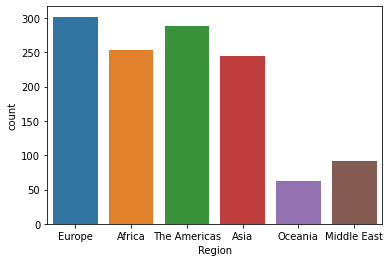

In [8]:
sns.countplot(df['Region'])

In [11]:
# write your code here
print(df1.info())
print(df1.describe())
print(df1.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            1243 non-null   object 
 1   CO2 Emissions     1243 non-null   int64  
 2   Ease of Business  1243 non-null   int64  
 3   Energy Usage      1243 non-null   int64  
 4   GDP               1243 non-null   float64
 5   Internet Usage    1236 non-null   float64
 6   Population Total  1243 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 68.1+ KB
None
       CO2 Emissions  Ease of Business   Energy Usage                   GDP  \
count    1243.000000       1243.000000    1243.000000           1243.000000   
mean   189766.624296         88.279968   75418.424779   353554814174.657288   
std    769702.722918         52.770388  270758.645334  1358969743285.446045   
min        48.000000          1.000000      30.000000      123258507.000000   
25%     

In [14]:
# write your code here
df= df1.drop(df1.loc[:,['Region',"Ease of Business",'Internet Usage']],axis = 1)
df

,CO2 Emissions,Energy Usage,GDP,Population Total
0,4294,1976,5652325082.000000,3033659
1,4166,2172,7464446950.000000,3014579
2,4254,2172,8376483740.000000,2992724
3,3865,2068,9132562332.000000,2968028
4,4056,2025,10701011856.000000,2940880
...,...,...,...,...
1238,2274,7213,7178556337.000000,11470022
1239,2226,7396,10702200822.000000,11781612
1240,1654,7399,11541420981.000000,12109620
1241,1845,7641,14640792100.000000,12456527


In [15]:
# write your code here
df.isnull().sum()

CO2 Emissions       0
Energy Usage        0
GDP                 0
Population Total    0
dtype: int64

<AxesSubplot:>

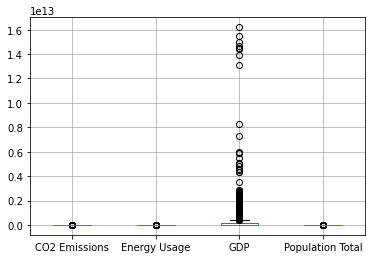

In [16]:
# write your code here
df.boxplot()

In [19]:
# write your code here
q3 = df.quantile(0.75)
q1 = df.quantile(0.25)
iqr = q3-q1
low = q1-3.5*iqr
upp = q3+3.5*iqr
dt = df[~((df < low) | (df > upp)).any(axis=1)]

<AxesSubplot:>

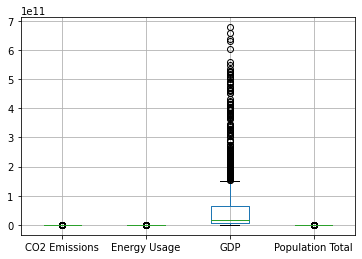

In [21]:
# write your code here
dt.boxplot()

In [23]:
# write your code here
scale = StandardScaler()
scaled  = scale.fit_transform(dt)

In [29]:
link_mat = linkage(scaled, method = 'ward')
link_mat[0:10]

array([[3.80000000e+02, 3.82000000e+02, 2.25694801e-05, 2.00000000e+00],
       [3.91000000e+02, 3.92000000e+02, 3.78208913e-05, 2.00000000e+00],
       [3.81000000e+02, 3.83000000e+02, 8.63012142e-05, 2.00000000e+00],
       [3.60000000e+01, 3.70000000e+01, 8.78688205e-05, 2.00000000e+00],
       [2.60000000e+01, 2.70000000e+01, 1.07365323e-04, 2.00000000e+00],
       [4.95000000e+02, 4.96000000e+02, 1.19667619e-04, 2.00000000e+00],
       [3.84000000e+02, 3.85000000e+02, 1.20059668e-04, 2.00000000e+00],
       [8.16000000e+02, 8.18000000e+02, 1.41060028e-04, 2.00000000e+00],
       [9.60000000e+02, 9.61000000e+02, 1.45534666e-04, 2.00000000e+00],
       [3.89000000e+02, 3.90000000e+02, 1.48856642e-04, 2.00000000e+00]])

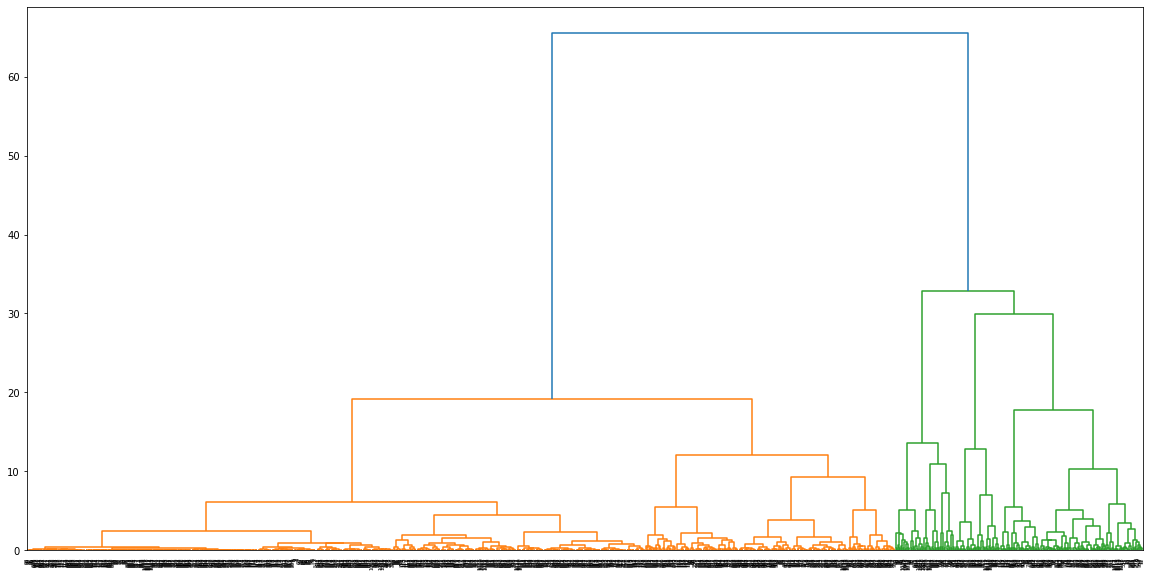

In [52]:
# write your code here
plt.figure(figsize=(20,10))
import scipy.cluster.hierarchy as sch 
den = sch.dendrogram(sch.linkage(scaled,method='ward'))

In [32]:
# write your code here
from scipy.cluster.hierarchy import cophenet
from sklearn.metrics.pairwise import euclidean_distances

distance  = euclidean_distances(scaled)
print(distance.shape)
actual = distance[np.triu_indices(1054,k = 1)]

coeff, cophetant_distance  = cophenet(link_mat,actual)
print(coeff)



(1054, 1054)
0.7973822617121825


In [48]:
# write your code here
from threading import main_thread
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=2, linkage = 'ward')
model.fit(scaled)

AgglomerativeClustering()

In [49]:
# write your code here
dt['cluster']=model.labels_

In [50]:
# write your code here
dt.cluster.value_counts()

1    820
0    234
Name: cluster, dtype: int64

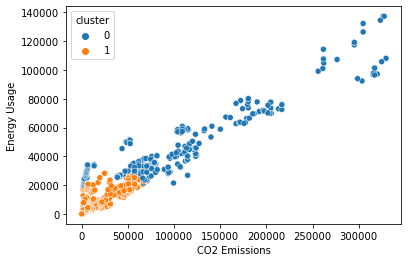

In [51]:
# write your code here
sns.scatterplot(y='Energy Usage',x='CO2 Emissions',data=dt,hue='cluster')
plt.show()

In [46]:
# write your code here
dt.loc[dt.cluster==1].head(10).describe()

,CO2 Emissions,Energy Usage,GDP,Population Total,cluster
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,6078.500000,3528.100000,11200916060.100000,5500119.500000,1.000000
std,4732.822161,3067.806218,3964798697.702017,5377109.419218,0.000000
min,3865.000000,1976.000000,5652325082.000000,2856673.000000,1.000000
25%,4074.250000,2059.500000,8565503388.000000,2919639.250000,1.000000
50%,4210.000000,2068.000000,11313982557.500000,2980376.000000,1.000000
75%,4291.250000,2172.000000,12672067742.000000,3028889.000000,1.000000
max,18793.000000,9676.000000,19640862550.000000,15976715.000000,1.000000


In [53]:
# write your code here
dt.loc[dt.cluster==0].head(10).describe()

,CO2 Emissions,Energy Usage,GDP,Population Total,cluster
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,111508.600000,36751.500000,138018883001.799988,35544611.300000,0.000000
std,13046.295789,4399.762399,46025034621.534073,1861027.721591,0.000000
min,89493.000000,30698.000000,67863832648.000000,33003442.000000,0.000000
25%,104754.250000,32915.750000,106500000000.000000,34097480.750000,0.000000
50%,113479.000000,37109.000000,136000000000.000000,35411210.000000,0.000000
75%,123475.000000,40643.500000,168500000000.000000,36892940.500000,0.000000
max,124586.000000,41852.000000,204000000000.000000,38481705.000000,0.000000


In [54]:
# write your code here
from sklearn.cluster import DBSCAN

In [65]:
db = DBSCAN(eps=0.7,min_samples=8)
db.fit(scaled)
labels = db.labels_
clus = pd.DataFrame(labels)
clus.value_counts()

 0    954
-1     82
 1     10
 2      8
dtype: int64

In [66]:
# write your code here
dt['dbclus'] = db.labels_
dt.head()


,CO2 Emissions,Energy Usage,GDP,Population Total,cluster,dbclus
0,4294,1976,5652325082.000000,3033659,1,0
1,4166,2172,7464446950.000000,3014579,1,0
2,4254,2172,8376483740.000000,2992724,1,0
3,3865,2068,9132562332.000000,2968028,1,0
4,4056,2025,10701011856.000000,2940880,1,0


In [67]:
dt[dt['dbclus'] == 0].value_counts()

CO2 Emissions  Energy Usage  GDP                  Population Total  cluster  dbclus
48             31            437072934.000000     214654            1        0         1
19156          9356          28233699240.000000   16544376          1        0         1
16835          5271          20955223881.000000   3853582           1        0         1
17180          7740          54554616826.000000   2021316           1        0         1
17492          5440          23781549758.000000   1337090           1        0         1
                                                                                      ..
3579           1455          8493167843.000000    2110791           1        0         1
3645           2095          3576615240.000000    3025652           1        0         1
3696           6981          16587921221.000000   18137734          1        0         1
3755           10218         15994094607.000000   26846016          1        0         1
124586         40823      

In [68]:
# write your code here
dt[dt['dbclus'] == -1].describe

<bound method NDFrame.describe of       CO2 Emissions  Energy Usage                 GDP  Population Total  \
39           141077         60954 344000000000.000000          36903067   
40           132632         57835 325000000000.000000          37273361   
42           133127         59047 157000000000.000000          37970411   
44           160952         66973 223000000000.000000          38647854   
45           174238         73128 264000000000.000000          38988923   
...             ...           ...                 ...               ...   
1227         102456         42475  66371664817.000000          83313000   
1228         113651         45777  77414425532.000000          84221100   
1229         127164         48984  99130304099.000000          85122300   
1230         140057         53450 106000000000.000000          86025000   
1231         150230         58912 116000000000.000000          86932500   

      cluster  dbclus  
39          0      -1  
40          0    